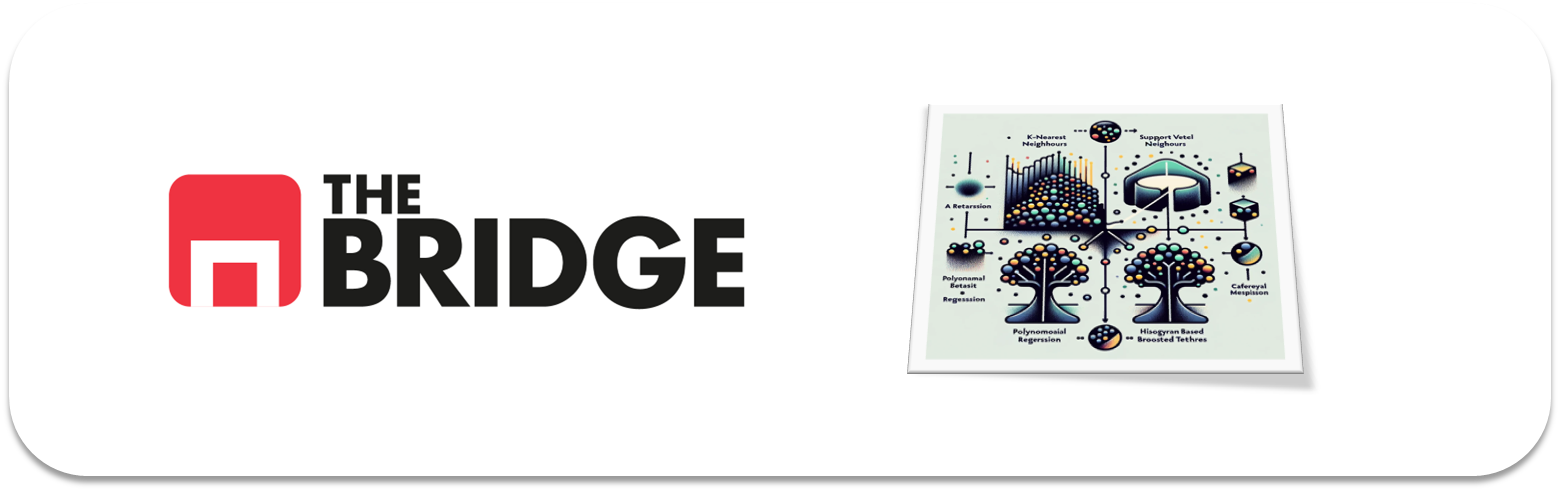

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from toolbox_ML import *

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv('./data/wines_dataset.csv', sep='|')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red


In [3]:
# Variables desbalanceadas

df['quality'].value_counts(True)

quality
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: proportion, dtype: float64

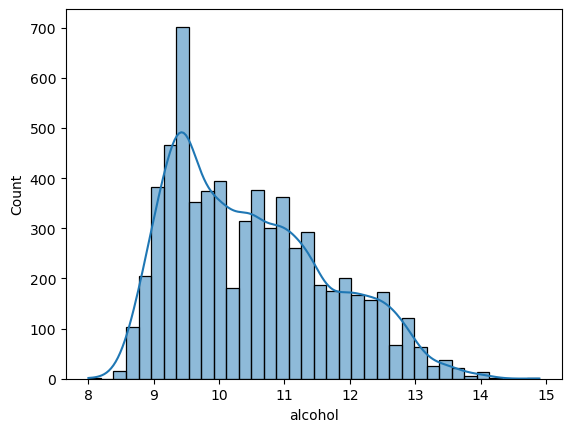

In [4]:
# En este caso buena distribución, no es gaussiana pero no tiene una larga cola, por lo que tal cual está nos sirve

sns.histplot(df['alcohol'], kde=True);

In [5]:
# Como vamos a usar el mismo dataset, realizamos ya la partición en train y test

set_train, set_test = train_test_split(df, test_size=0.2, random_state=42)

# Y seleccionamos los target

target_clf = 'quality'
target_reg = 'alcohol'

In [6]:
# Como usaremos un modelo KNN como baseline, y éste es sensible a la escala, nos crearemos otros sets escalados
# Echamos un vistazo a la distribución de los datos y cardinalidades

pd.concat([set_train.describe().T, describe_df(set_train).T.drop('COL_N')], axis=1)

,count,mean,std,min,25%,50%,75%,max,,,,
fixed acidity,5197.0,7.213527,1.293974,3.90000,6.40000,7.0000,7.700,15.50000,float64,0.0,100,1.92
volatile acidity,5197.0,0.339548,0.162938,0.08000,0.23000,0.2900,0.400,1.33000,float64,0.0,177,3.41
citric acid,5197.0,0.319244,0.145978,0.00000,0.25000,0.3100,0.400,1.66000,float64,0.0,87,1.67
residual sugar,5197.0,5.466615,4.783581,0.60000,1.80000,3.0000,8.100,65.80000,float64,0.0,308,5.93
chlorides,5197.0,0.055733,0.032656,0.01200,0.03800,0.0470,0.065,0.61100,float64,0.0,194,3.73
free sulfur dioxide,5197.0,30.563306,18.004967,1.00000,17.00000,29.0000,41.000,289.00000,float64,0.0,132,2.54
total sulfur dioxide,5197.0,115.592457,56.805306,6.00000,76.00000,118.0000,156.000,440.00000,float64,0.0,274,5.27
density,5197.0,0.994714,0.003012,0.98711,0.99236,0.9949,0.997,1.03898,float64,0.0,951,18.3
pH,5197.0,3.219144,0.160025,2.72000,3.11000,3.2100,3.320,4.01000,float64,0.0,106,2.04
sulphates,5197.0,0.531083,0.147928,0.22000,0.43000,0.5100,0.600,1.98000,float64,0.0,106,2.04


In [7]:
# Establecemos listas para features categoricas y numéricas (trataremos todas las variables numéricas como continuas)

features_cat = ['quality','class']
features_num = [feature for feature in set_train.columns if feature not in features_cat]

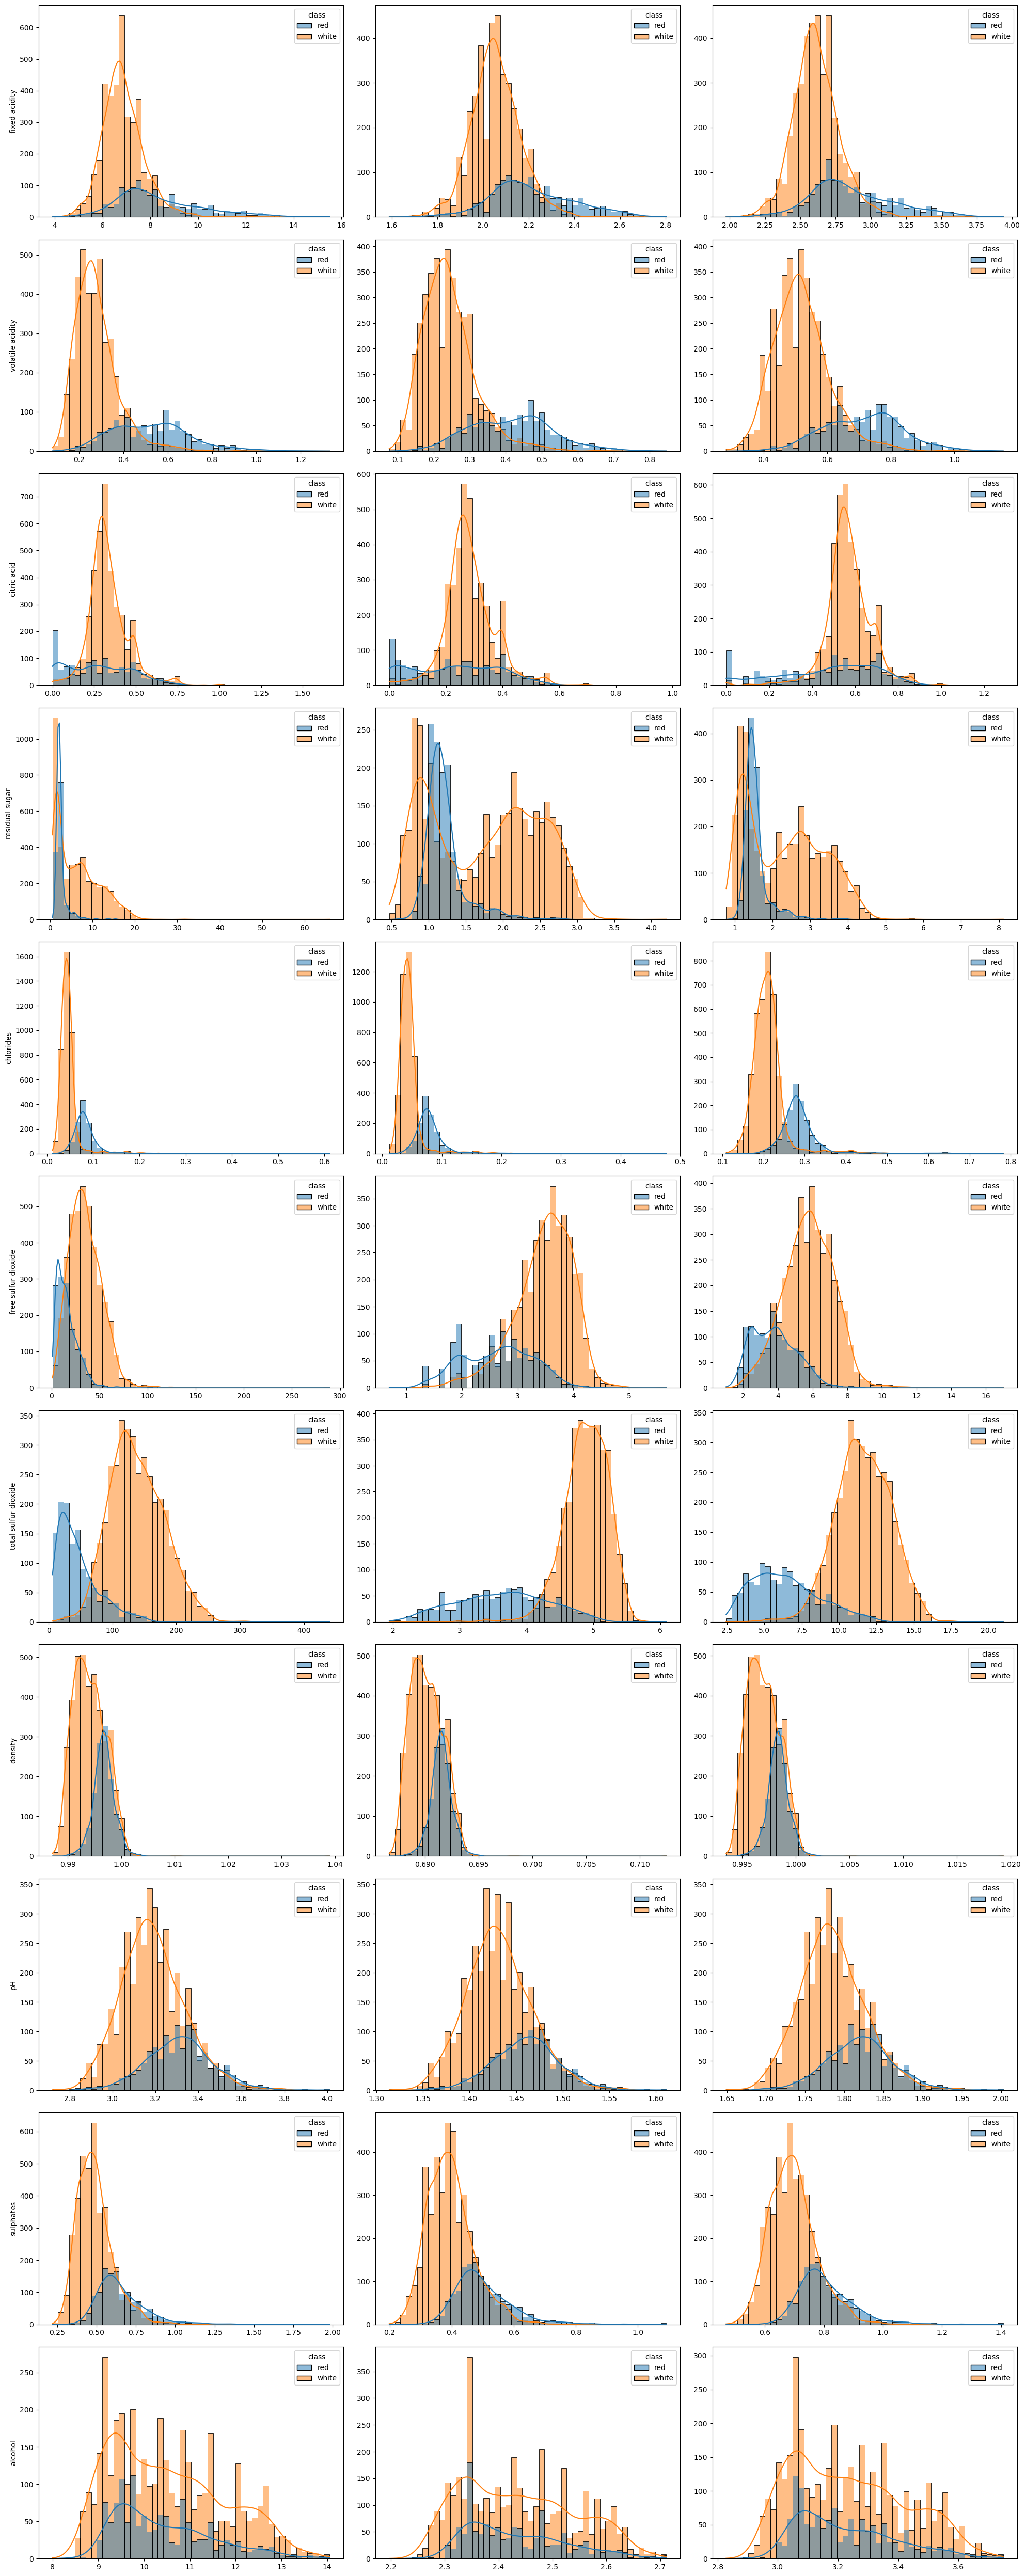

In [8]:
# Echamos un vistazo a la distribución de las variables numéricas para valorar su transformación

fig, ax = plt.subplots(len(features_num),3, figsize=(20,50))
for index, feature in enumerate(features_num):
    # Aplicamos raíz cuadrada a las features ya que algunas tienen valor 0 como mínimo 
    log_feature = np.log1p(set_train[feature])
    sqrt_feature = np.sqrt(set_train[feature])
    sns.histplot(set_train, x=feature, hue='class', bins=50, kde=True, ax=ax[index, 0])
    sns.histplot(set_train, x=log_feature, hue='class', bins=50, kde=True, ax=ax[index, 1])
    sns.histplot(set_train, x=sqrt_feature, hue='class', bins=50, kde=True, ax=ax[index, 2])
    ax[index, 0].set_xlabel('')
    ax[index, 1].set_xlabel('')
    ax[index, 2].set_xlabel('')
    ax[index, 0].set_ylabel(feature)
    ax[index, 1].set_ylabel('')
    ax[index, 2].set_ylabel('')
plt.tight_layout();

In [9]:
# Las variables con máximos > 15 le aplicaremos un logaritmo para normalizarlas
# Y al resto le aplicaremos raíz cuadrada(algunas no las necesitan, pero al aplicar a todo no nos confundimos)
# Sólo dejaremos sin tocar 'alcohol', que tiene buena distribución, aunque posteriormente también la escalaremos

log_feature = [feature for feature in set_train[features_num] if set_train[feature].max() > 15]
sqrt_feature = [feature for feature in set_train[features_num] if feature not in log_feature and feature != 'alcohol']

In [10]:
print('Log_features:\t', log_feature)
print('Sqrt_features:\t', sqrt_feature)

Log_features:	 ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']
Sqrt_features:	 ['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates']


In [11]:
# Hacemos copia de nuestros datasets originales y reseteamos los índices para no perder filas

set_train_scale = set_train.copy()
set_train_scale.reset_index(inplace=True)

set_test_scale = set_test.copy()
set_test_scale.reset_index(inplace=True)

In [12]:
# Aplicamos las transformaciones

set_train_scale[log_feature] = np.log1p(set_train_scale[log_feature])
set_train_scale[sqrt_feature] = np.sqrt(set_train_scale[sqrt_feature])

set_test_scale[log_feature] = np.log1p(set_test_scale[log_feature])
set_test_scale[sqrt_feature] = np.sqrt(set_test_scale[sqrt_feature])

In [13]:
#Y escalamos para centrar las distribuciones

scaler = StandardScaler()
set_train_scale[features_num] = scaler.fit_transform(set_train_scale[features_num]) # entrenamos y transformamos
set_test_scale[features_num] = scaler.transform(set_test_scale[features_num])       # transformamos según los datos de train

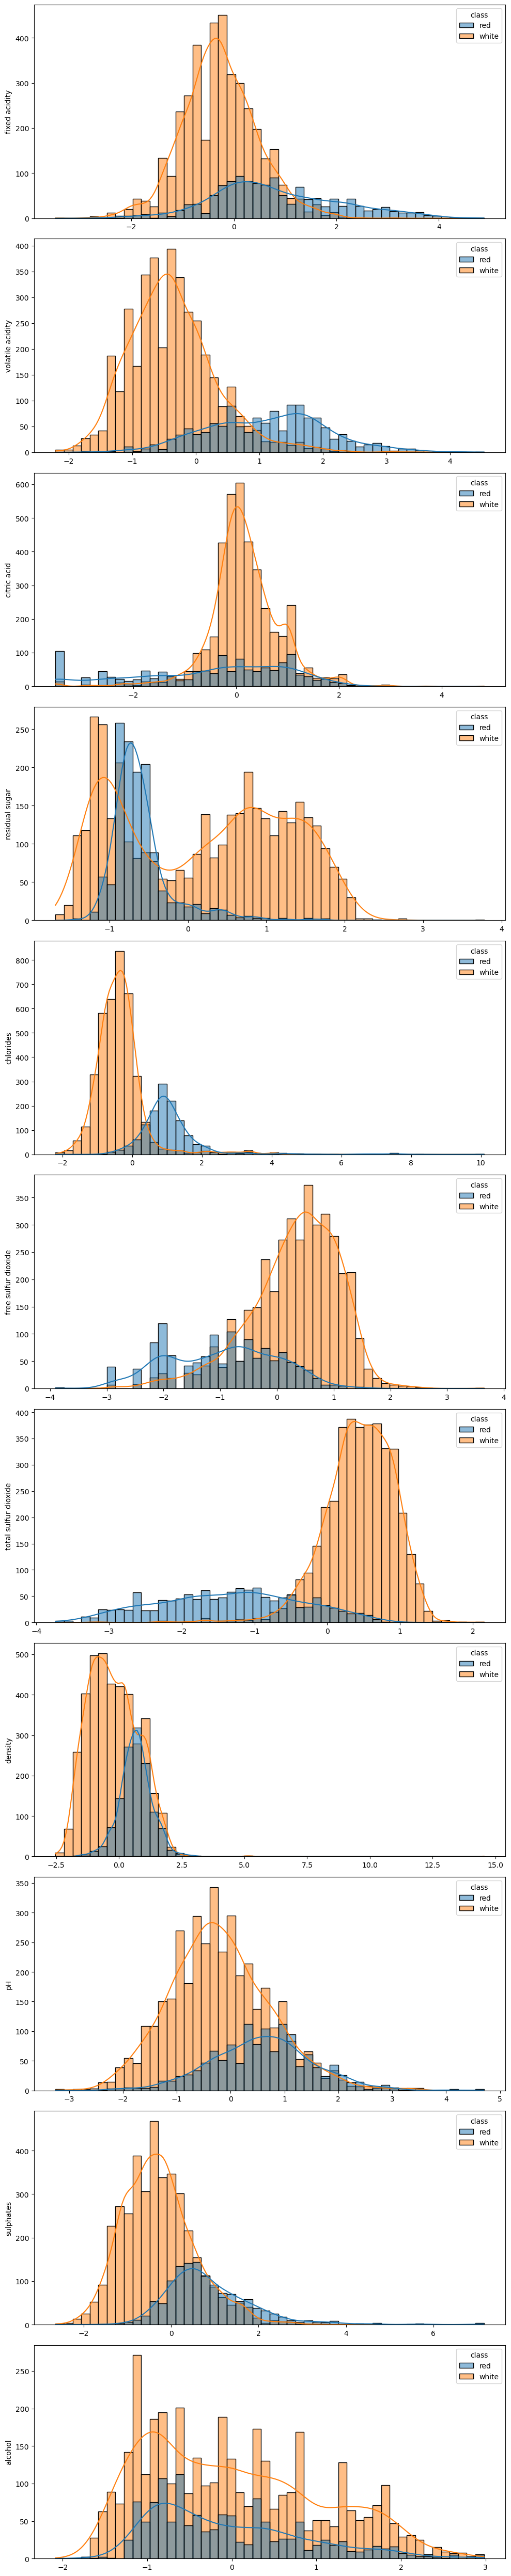

In [14]:
# Comprobamos las distribuciones finales

fig, ax = plt.subplots(len(features_num),1, figsize=(10,50))
for index, feature in enumerate(features_num):
    sns.histplot(set_train_scale, x=feature, hue='class', bins=50, kde=True, ax=ax[index])
    ax[index].set_xlabel('')
    ax[index].set_ylabel(feature)
plt.tight_layout();

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [15]:
# Primero veamos la relación de cada variable con nuestro target
# Para ello aprovecharemos que 'quality' es una variable numérica
# y miraremos con qué otras variables correlaciona mejor

set_train[features_num + [target_clf]].corr()['quality'].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.450403
density                 0.305107
volatile acidity        0.255368
chlorides               0.197389
citric acid             0.096020
fixed acidity           0.071698
sulphates               0.052398
total sulfur dioxide    0.050816
free sulfur dioxide     0.039678
residual sugar          0.039630
pH                      0.011918
Name: quality, dtype: float64

In [16]:
# Parece que las variables sin tratar correlacionan poco
# Contrastamos con nuestro dataset escalado y vemos que las 5 primeras features coinciden
# el ácido cítrico correlaciona ahora por encima de 0.1, sin embargo las demás no, por lo que las descartaremos

set_train_scale[features_num + [target_clf]].corr()['quality'].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.450403
density                 0.305392
volatile acidity        0.254773
chlorides               0.237714
citric acid             0.125544
free sulfur dioxide     0.095922
fixed acidity           0.081143
sulphates               0.046500
residual sugar          0.021947
pH                      0.012283
total sulfur dioxide    0.000220
Name: quality, dtype: float64

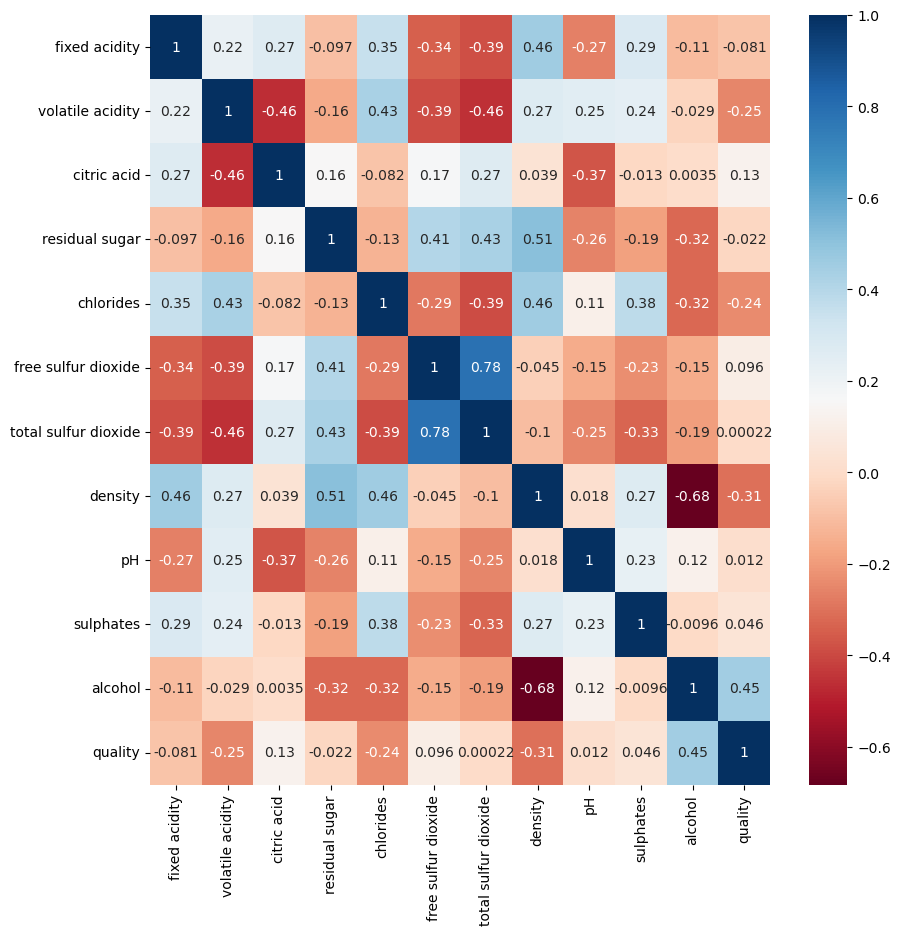

In [17]:
# Podríamos ver si alguna de las variables correlaciona con otra, 
# pero como son solamente 5 nos quedamos con todas
# No obstante, se le puede echar un vistazo a la matriz de corelación completa
# Y vemos que 'volatile acidity' y 'citrid acid' tienen una correlación media con algunas variables descartadas y entre sí, lo que apoya la decisión del descarte

plt.subplots(1,1, figsize=(10,10))
sns.heatmap(set_train_scale[features_num + [target_clf]].corr(), annot=True, cmap='RdBu');

In [18]:
features_num_corr = set_train_scale[features_num + [target_clf]].corr()['quality'].abs().sort_values(ascending=False)[1:6].index.to_list()


red wines:
quality
5    0.415504
6    0.406202
7    0.128682
4    0.033333
8    0.010078
3    0.006202
Name: proportion, dtype: float64

white wines:
quality
6    0.447914
5    0.299463
7    0.179933
8    0.034041
4    0.033274
3    0.004095
9    0.001280
Name: proportion, dtype: float64


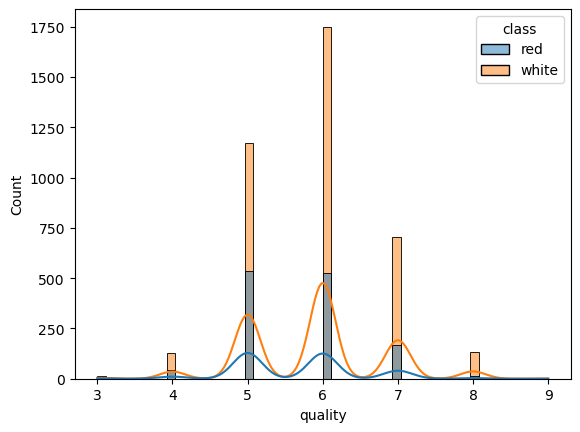

In [19]:
# Ahora comprobamos la relación entre el tipo de vino (rojo o blanco) y el target

for tipo in set_train['class'].unique():
    print(f'\n{tipo} wines:')
    print(set_train[set_train['class'] == tipo].quality.value_counts(True))
sns.histplot(set_train_scale, x='quality', hue='class', kde=True);

In [20]:
# No parece haber mucha diferencia, aunque quizás sí la marque para categorías superiores
# (sólo hay categoria 9 en vinos blancos, además de mayor porcentaje de categoría 8)
# Nos la quedamos pero aplicamos un one-hot encoder para poder tratarla

set_train_scale = pd.get_dummies(set_train_scale, columns=['class'], dtype=int)
set_test_scale = pd.get_dummies(set_test_scale, columns=['class'], dtype=int)

In [33]:
# Ahora creamos nuestras parejas X, y, de momento solo para train, ya que prbaremos varias features
# Ojo, crearemos las parejas por defecto con los datos escalados (que tenian mejor correlación)

X_train_all = set_train_scale[features_num + ['class_red','class_white']]
X_train_corr = set_train_scale[features_num_corr + ['class_red','class_white']]
y_train = set_train_scale['quality'] 

In [34]:
# Hacemos igual para los dataset no escalados

X_train_normal_all = pd.get_dummies(set_train, columns=['class'], dtype=int)[features_num + ['class_red','class_white']]
X_train_normal_corr = pd.get_dummies(set_train, columns=['class'], dtype=int)[features_num_corr + ['class_red','class_white']]
y_train_normal = set_train[target_clf]

In [31]:
# Instanciamos los modelos

knn = KNeighborsClassifier(n_neighbors=5)                       # Valor por defecto
rforest = RandomForestClassifier(max_depth=5, 
                                class_weight='balanced', 
                                random_state=42)                # Asignamos random_state para igualar condiciones con LightGBM
xgb = XGBClassifier(max_depth = 5, random_state = 42)

In [35]:
print('Features corr:')
print('KNN:\t\t\t', np.mean(cross_val_score(knn, X_train_corr, y_train, cv=5, scoring='balanced_accuracy')))
print('RForest:\t\t', np.mean(cross_val_score(rforest, X_train_corr, y_train, cv=5, scoring='balanced_accuracy')))
print('RForest sin esc.:\t', np.mean(cross_val_score(rforest, X_train_normal_corr, y_train_normal, cv=5, scoring='balanced_accuracy')))

print('\nAll features:')
print('KNN:\t\t\t', np.mean(cross_val_score(knn, X_train_all, y_train, cv=5, scoring='balanced_accuracy')))
print('RForest:\t\t', np.mean(cross_val_score(rforest, X_train_all, y_train, cv=5, scoring='balanced_accuracy')))
print('RForest sin esc.:\t', np.mean(cross_val_score(rforest, X_train_normal_all, y_train_normal, cv=5, scoring='balanced_accuracy')))

Features corr:
KNN:			 0.25294356234044846
RForest:		 0.29982742978191934
RForest sin esc.:	 0.2991556464908622

All features:
KNN:			 0.26362035167651676
RForest:		 0.31726891872563556
RForest sin esc.:	 0.3109849764906366


In [37]:
params_grid = {
    'n_estimators':[100, 200, 300],
    'max_depth':[5, 10, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features':['sqrt', None]
}

rf_grid = GridSearchCV(rforest, param_grid=params_grid, cv=5, scoring='balanced_accuracy')
rf_grid.fit(X_train_all,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=5, random_state=42),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

In [38]:
rf_grid.best_score_

np.float64(0.3714846630768309)

In [39]:
rf_grid.best_params_

{'max_depth': 30,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [46]:
rf_best = rf_grid.best_estimator_

pd.DataFrame({'Features':rf_best.feature_names_in_, 'Weights':rf_best.feature_importances_}).sort_values('Weights', ascending=False)

,Features,Weights
10,alcohol,0.118355
5,free sulfur dioxide,0.113865
4,chlorides,0.112288
0,fixed acidity,0.108694
7,density,0.100387
6,total sulfur dioxide,0.088771
1,volatile acidity,0.086840
8,pH,0.078324
9,sulphates,0.069871
3,residual sugar,0.060647


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.